Aprendizado Profundo

### Redes Convolucionais

- Carregamento dos pacotes necessários
- Carregamento dos dados (MNIST)
- Desenvolvimento de um modelo MLP
- Desenvolvimento de um modelo CNN
- Transferência de aprendizagem (transfer learning): Cat vs. Dog

Observações: 
- ativar a GPU (Menu [Runtime], opção [Change runtime type])
- Sem GPU, a execução deste caderno pode levar mais de 40 minutos.


# Pacotes

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
import keras.datasets as kds

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

print(tf.__version__)

2.12.0


# Carregamento dos Dados

## MNIST (Digitos)

### Um dataset público com 70000 exemplos (60K Treino / 10K Teste)

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png">

Ver: http://yann.lecun.com/exdb/mnist/

## Dados

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

# Carga dos dados (keras.datasets)
(x_train, y_train), (x_test, y_test) = kds.mnist.load_data()

# Normalização das features
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Conversão das classes em vetores one-hot-encoding 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11490434/11490434 [==============================] - 0s 0us/step


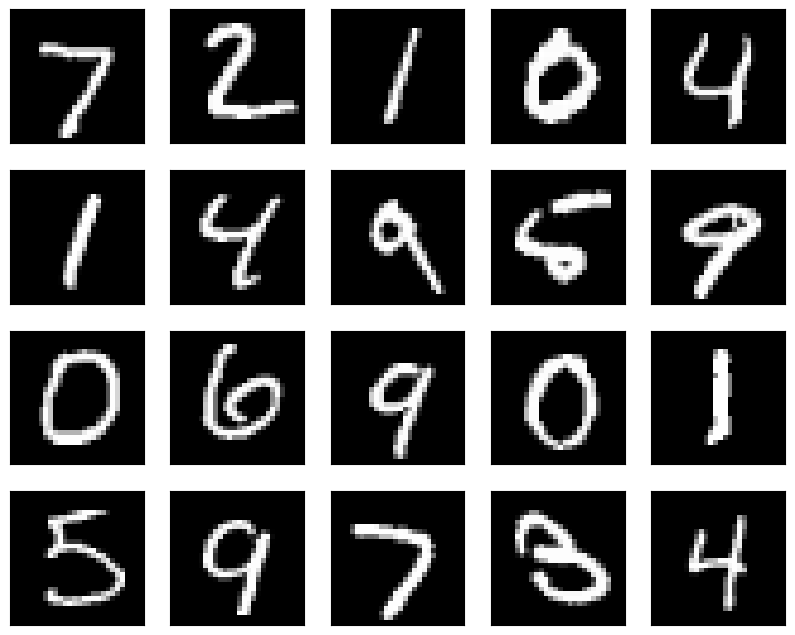

In [3]:
plt.figure(figsize=(10, 8))
for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Modelo 01 - MLP

In [4]:
# Modelo Linear (sem camada oculta)
modelo1 = keras.Sequential()
modelo1.add(keras.layers.Flatten(input_shape=input_shape))
modelo1.add(keras.layers.Dense(units=10, activation="softmax"))

modelo1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


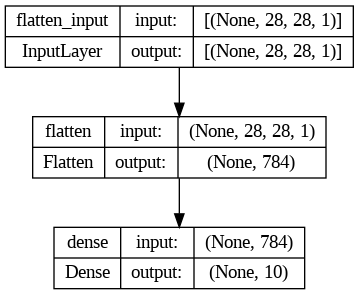

In [5]:
#Grafo da rede gerada
tf.keras.utils.plot_model(modelo1, show_shapes=True)

In [6]:
modelo1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#treinamento
history = modelo1.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 5s - loss: 0.9289 - accuracy: 0.7794 - val_loss: 0.5040 - val_accuracy: 0.8807 - 5s/epoch - 28ms/step
Epoch 2/30
188/188 - 1s - loss: 0.4662 - accuracy: 0.8823 - val_loss: 0.3851 - val_accuracy: 0.8988 - 613ms/epoch - 3ms/step
Epoch 3/30
188/188 - 1s - loss: 0.3877 - accuracy: 0.8971 - val_loss: 0.3433 - val_accuracy: 0.9075 - 575ms/epoch - 3ms/step
Epoch 4/30
188/188 - 1s - loss: 0.3517 - accuracy: 0.9054 - val_loss: 0.3193 - val_accuracy: 0.9133 - 567ms/epoch - 3ms/step
Epoch 5/30
188/188 - 1s - loss: 0.3303 - accuracy: 0.9097 - val_loss: 0.3059 - val_accuracy: 0.9157 - 573ms/epoch - 3ms/step
Epoch 6/30
188/188 - 1s - loss: 0.3158 - accuracy: 0.9133 - val_loss: 0.2960 - val_accuracy: 0.9178 - 550ms/epoch - 3ms/step
Epoch 7/30
188/188 - 1s - loss: 0.3056 - accuracy: 0.9158 - val_loss: 0.2900 - val_accuracy: 0.9183 - 647ms/epoch - 3ms/step
Epoch 8/30
188/188 - 1s - loss: 0.2977 - accuracy: 0.9173 - val_loss: 0.2836 - val_accuracy: 0.9212 - 783ms/epoch - 4ms/step
Ep

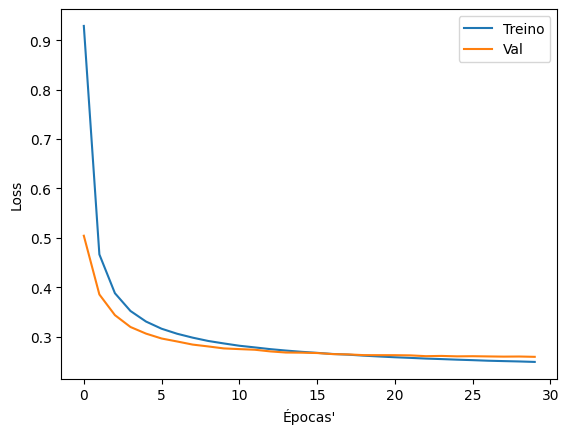

In [7]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Treino")
plt.plot(history.history['val_loss'], label="Val")
plt.legend()
plt.show()

In [8]:
# Avaliação do modelo treinado no conjunto de teste
print("Avaliação do modelo (Teste)")
results = modelo1.evaluate(x_test, y_test, batch_size=1000)
print("Test loss, Test acc:", results)



Avaliação do modelo (Teste)
10/10 [==============================] - 0s 4ms/step - loss: 0.2644 - accuracy: 0.9275
Test loss, Test acc: [0.2644372880458832, 0.9275000095367432]


# Modelo 02 - MLP

In [9]:
modelo2 = keras.Sequential()
modelo2.add(keras.layers.Flatten(input_shape=input_shape))
modelo2.add(keras.layers.Dense(units=100, activation="relu"))
modelo2.add(keras.layers.Dense(units=10, activation="softmax"))

modelo2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


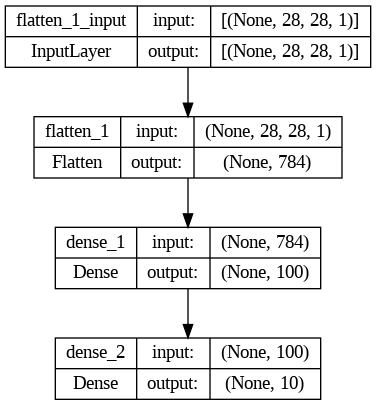

In [10]:
#Grafo da rede gerada
tf.keras.utils.plot_model(modelo2, show_shapes=True)

In [11]:
modelo2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = modelo2.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 2s - loss: 0.5216 - accuracy: 0.8606 - val_loss: 0.2603 - val_accuracy: 0.9291 - 2s/epoch - 9ms/step
Epoch 2/30
188/188 - 1s - loss: 0.2386 - accuracy: 0.9336 - val_loss: 0.1975 - val_accuracy: 0.9461 - 661ms/epoch - 4ms/step
Epoch 3/30
188/188 - 1s - loss: 0.1836 - accuracy: 0.9488 - val_loss: 0.1657 - val_accuracy: 0.9544 - 624ms/epoch - 3ms/step
Epoch 4/30
188/188 - 1s - loss: 0.1496 - accuracy: 0.9572 - val_loss: 0.1450 - val_accuracy: 0.9589 - 596ms/epoch - 3ms/step
Epoch 5/30
188/188 - 1s - loss: 0.1256 - accuracy: 0.9637 - val_loss: 0.1321 - val_accuracy: 0.9617 - 664ms/epoch - 4ms/step
Epoch 6/30
188/188 - 1s - loss: 0.1077 - accuracy: 0.9698 - val_loss: 0.1194 - val_accuracy: 0.9653 - 617ms/epoch - 3ms/step
Epoch 7/30
188/188 - 1s - loss: 0.0943 - accuracy: 0.9730 - val_loss: 0.1129 - val_accuracy: 0.9658 - 829ms/epoch - 4ms/step
Epoch 8/30
188/188 - 1s - loss: 0.0831 - accuracy: 0.9768 - val_loss: 0.1077 - val_accuracy: 0.9681 - 1s/epoch - 6ms/step
Epoch 

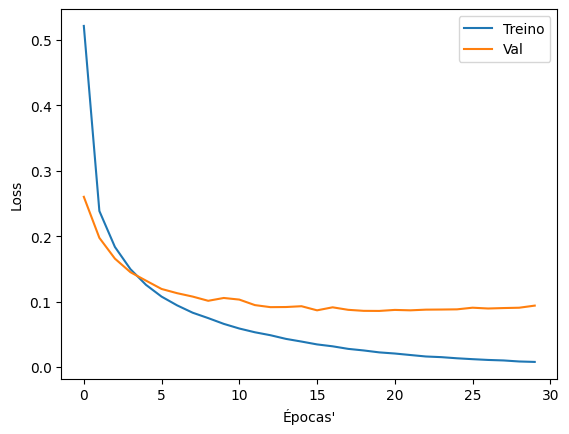

In [12]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Treino")
plt.plot(history.history['val_loss'], label="Val")
plt.legend()
plt.show()


In [13]:
# Avaliação do modelo treinado no conjunto de tete
print("Avaliação do modelo (Teste)")
results = modelo2.evaluate(x_test, y_test)
print("Test loss, Test acc:", results)


Avaliação do modelo (Teste)
313/313 [==============================] - 1s 3ms/step - loss: 0.0825 - accuracy: 0.9769
Test loss, Test acc: [0.08250092715024948, 0.9768999814987183]


# Modelo 2 - CNN

In [14]:
modelo3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(5, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

modelo3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 5)         50        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 5)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 10)        460       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 250)               0         
                                                                 
 dense_3 (Dense)             (None, 10)               

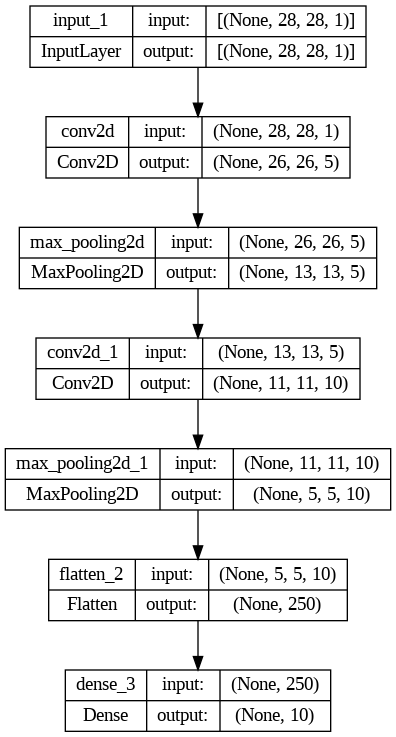

In [16]:
#Grafo da rede gerada
tf.keras.utils.plot_model(modelo3, show_shapes=True)

In [17]:
modelo3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = modelo3.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 7s - loss: 0.9396 - accuracy: 0.7361 - val_loss: 0.3123 - val_accuracy: 0.9110 - 7s/epoch - 39ms/step
Epoch 2/30
188/188 - 1s - loss: 0.2782 - accuracy: 0.9167 - val_loss: 0.2108 - val_accuracy: 0.9394 - 791ms/epoch - 4ms/step
Epoch 3/30
188/188 - 1s - loss: 0.1975 - accuracy: 0.9399 - val_loss: 0.1671 - val_accuracy: 0.9506 - 799ms/epoch - 4ms/step
Epoch 4/30
188/188 - 1s - loss: 0.1585 - accuracy: 0.9517 - val_loss: 0.1382 - val_accuracy: 0.9590 - 782ms/epoch - 4ms/step
Epoch 5/30
188/188 - 1s - loss: 0.1333 - accuracy: 0.9592 - val_loss: 0.1221 - val_accuracy: 0.9638 - 794ms/epoch - 4ms/step
Epoch 6/30
188/188 - 1s - loss: 0.1195 - accuracy: 0.9630 - val_loss: 0.1153 - val_accuracy: 0.9655 - 850ms/epoch - 5ms/step
Epoch 7/30
188/188 - 1s - loss: 0.1073 - accuracy: 0.9675 - val_loss: 0.1056 - val_accuracy: 0.9683 - 1s/epoch - 6ms/step
Epoch 8/30
188/188 - 1s - loss: 0.0992 - accuracy: 0.9697 - val_loss: 0.0993 - val_accuracy: 0.9696 - 1s/epoch - 5ms/step
Epoch 9/

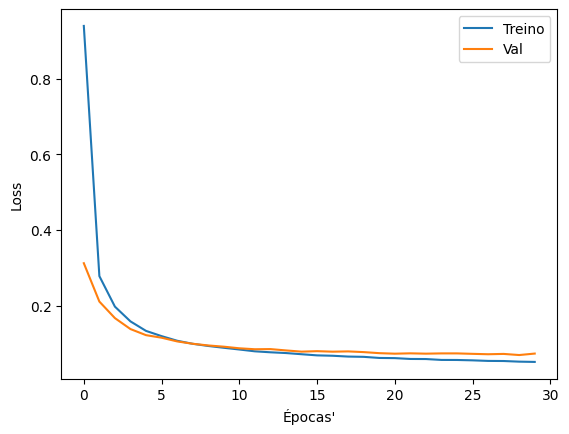

In [18]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Treino")
plt.plot(history.history['val_loss'], label="Val")
plt.legend()
plt.show()


In [19]:
# Avaliação do modelo treinado no conjunto de tete
print("Avaliação do modelo (Teste)")
results = modelo3.evaluate(x_test, y_test, batch_size=1000)
print("Test loss, Test acc:", results)


Avaliação do modelo (Teste)
10/10 [==============================] - 0s 5ms/step - loss: 0.0663 - accuracy: 0.9794
Test loss, Test acc: [0.06625790894031525, 0.9793999791145325]


# Transfer Learning

O código abaixo foi baseado no caderno Colab disponível em:
https://github.com/google/eng-edu/tree/main/ml/pc/exercises

## Carregamento do Modelo Inception V3

In [20]:
from tensorflow.keras.applications import InceptionV3, ResNet50V2

inception = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights="imagenet")


87910968/87910968 [==============================] - 0s 0us/step


Parâmetro: `include_top=False` informa que as camadas densas finais não devem ser carregadas. Utilizado quando queremos usar o modelo como um extrator de características e não um classificador

## Congelamento das Camadas (extrator)

In [21]:
for layer in inception.layers:
  layer.trainable = False
  

In [22]:
last_layer = inception.get_layer('mixed7')
print('Dimensões da última camada da rede:', last_layer.output_shape)
last_output = last_layer.output

Dimensões da última camada da rede: (None, 7, 7, 768)


## Construção do Modelo (Classificação Binária)

In [23]:
# Flattening da última camada convolucional
x = layers.Flatten()(last_output)
# Camada densa com 512 neurônios
x = layers.Dense(512, activation='relu')(x)
# Dropout de 0.2
x = layers.Dropout(0.2)(x)
# Neurônio de saída - classificação binária
x = layers.Dense(1, activation='sigmoid')(x)

# Criação do modelo: 
modelo4 = Model(inception.input, x)

modelo4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

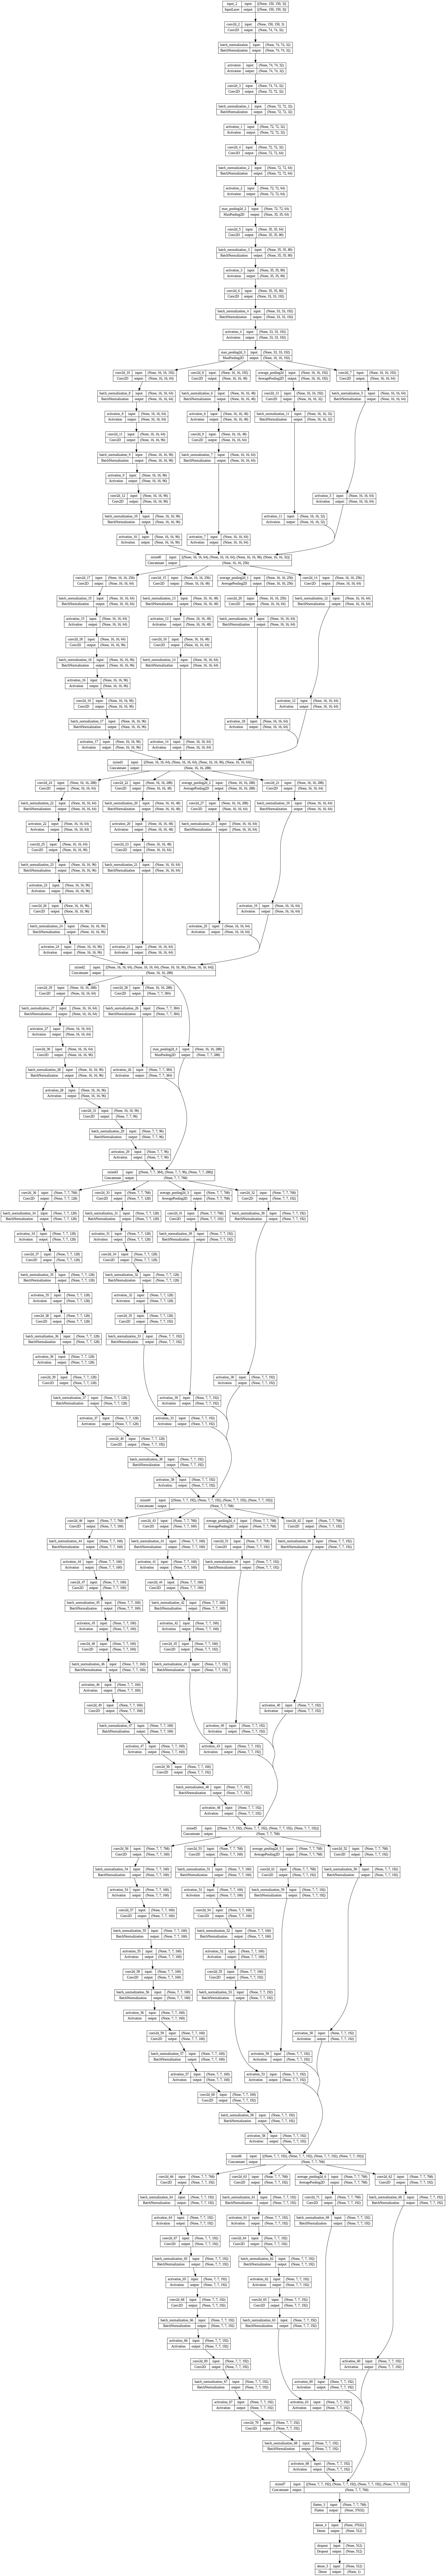

In [24]:
tf.keras.utils.plot_model(modelo4, show_shapes=True)

## Carga do dataset Cats & Dogs

In [25]:
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   /tmp/cats_and_dogs_filtered.zip

--2023-05-01 13:08:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 74.125.201.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   256MB/s    in 0.3s    

2023-05-01 13:08:08 (256 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Preparação do conjunto para treinamento

In [26]:
import os
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Exemplo Imagens Cachorros

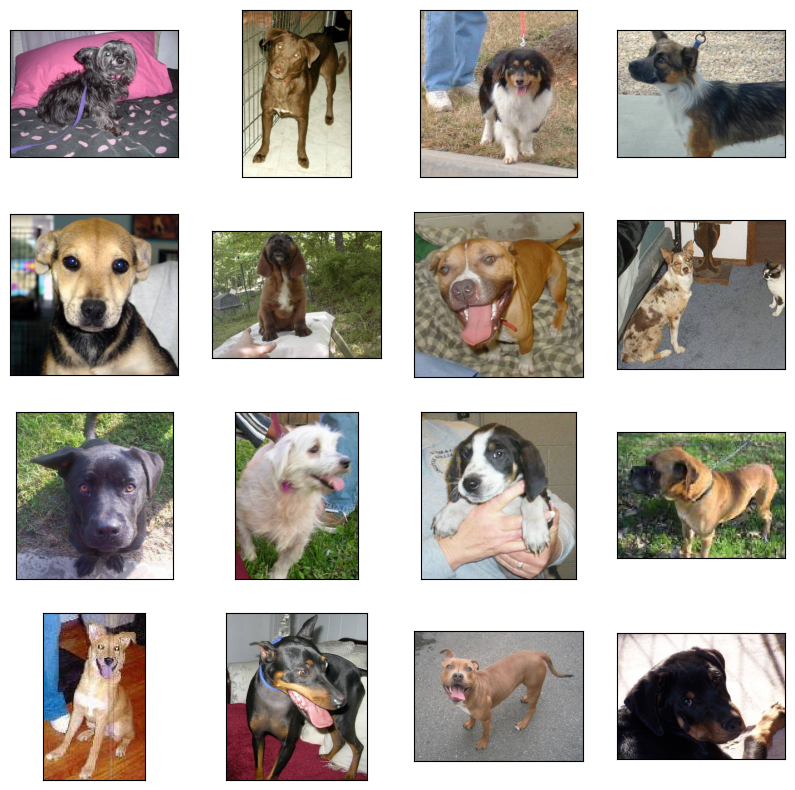

In [27]:
# Imagens de Cachorros
plt.figure(figsize=(10, 10))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  filename = train_dogs_dir + '/dog.' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### Exemplo Imagens Gatos

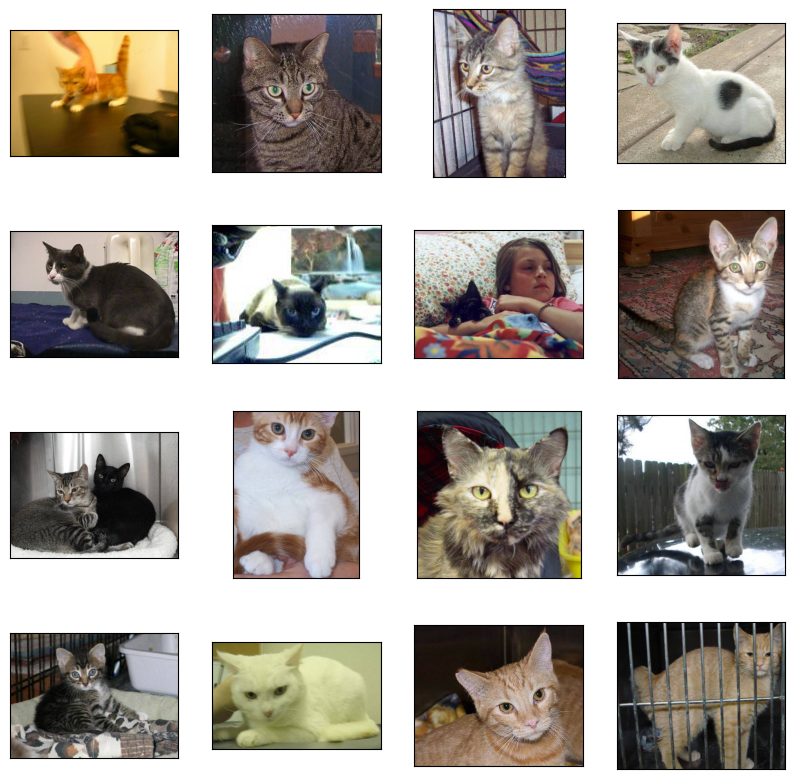

In [28]:
# Imagens de Gatos
plt.figure(figsize=(10, 10))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  filename = train_cats_dir + '/cat.' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Treinamento do Modelo (camadas finais)

FC - Fully Connected Layers

In [29]:
history = modelo4.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10
100/100 - 25s - loss: 0.4587 - acc: 0.8690 - val_loss: 0.1263 - val_acc: 0.9480 - 25s/epoch - 255ms/step
Epoch 2/10
100/100 - 19s - loss: 0.1632 - acc: 0.9360 - val_loss: 0.0884 - val_acc: 0.9680 - 19s/epoch - 187ms/step
Epoch 3/10
100/100 - 20s - loss: 0.1396 - acc: 0.9485 - val_loss: 0.1026 - val_acc: 0.9610 - 20s/epoch - 196ms/step
Epoch 4/10
100/100 - 19s - loss: 0.1286 - acc: 0.9475 - val_loss: 0.1138 - val_acc: 0.9510 - 19s/epoch - 186ms/step
Epoch 5/10
100/100 - 21s - loss: 0.1311 - acc: 0.9465 - val_loss: 0.0866 - val_acc: 0.9640 - 21s/epoch - 206ms/step
Epoch 6/10
100/100 - 21s - loss: 0.1355 - acc: 0.9490 - val_loss: 0.0984 - val_acc: 0.9610 - 21s/epoch - 208ms/step
Epoch 7/10
100/100 - 19s - loss: 0.1346 - acc: 0.9460 - val_loss: 0.1037 - val_acc: 0.9580 - 19s/epoch - 189ms/step
Epoch 8/10
100/100 - 20s - loss: 0.1024 - acc: 0.9610 - val_loss: 0.1118 - val_acc: 0.9500 - 20s/epoch - 198ms/step
Epoch 9/10
100/100 - 19s - loss: 0.0963 - acc: 0.9650 - val_loss: 0.0916

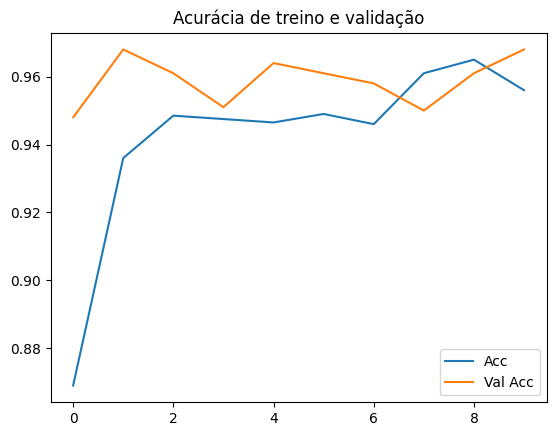

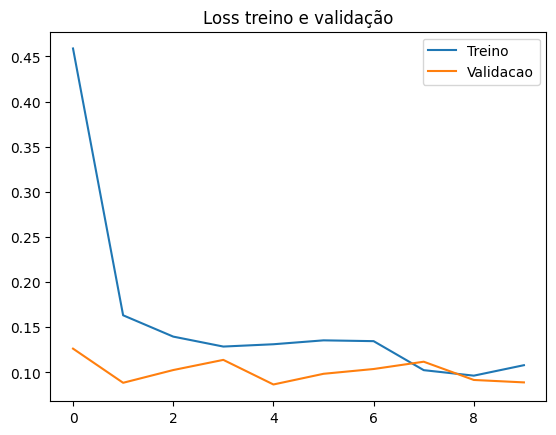

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

# número de épocas
epochs = range(len(acc))

plt.plot(epochs, acc, label="Acc")
plt.plot(epochs, val_acc, label="Val Acc")
plt.title('Acurácia de treino e validação')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label="Treino")
plt.plot(epochs, val_loss, label="Validacao")
plt.title('Loss treino e validação')
plt.legend()


# Exercício de Apoio

### Realizar as seguintes atividades:


1. Avaliar a acurácia de classificação do MNIST com outras configurações das redes MLP e CNN
2. Executar os mesmos experimentos com o conjunto MNIST-Fashion (kds.fashion_mnist.load_data())
3. Realizar o transfer learning com outros modelos disponíveis no Keras (VGG, etc.) e avaliar os resultados de classificação da base Cats vs. Dogs. Ver modelos disponíveis em: https://keras.io/api/applications/



